# Using NN with appropriate loss functions for fitting flexible regression models

**Goal:** .
In this notebook you see how to step-wise adapt the NN architecture and the loss function to develop a regression model that achieves a good fit for some simulated data with non-linear structure and non-constant data variablilty. 

**Usage:** . 
Read chapter 4.3 and step through the code and play with it to understand what is going on. 

**Dataset:** 
Artificial.

**Content:**
* Simulate some data with non-linear relationship between x and y and changing data variablility.
* View regression as model for the conditional Normal distribution for the outcome where the mean and standard deviation can depend on x
* Fist model: Use a NN w/o hidden layer and with one output node to  fit a linear regression model where the mean parameter of the CPD linearly depends on x. The loss function is given by the NLL which reduces for constant variance to the MSE.
* Second model: Use a NN with hidden layer and with one output node to  fit a linear regression model where the mean parameter of the CPD can non-linearly depend on x. The loss function is given by the NLL which reduces for constant variance to the MSE.
*  Third model: Use a NN with hidden layer and two output node to  fit a linear regression model where the mean and the standard-deviation parameter of the CPD can non-linearly depend on x. The loss function is given by the NLL which cannot be reduced to the MSE because the variance is not constant.


| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_04/nb_ch04_04.ipynb)



## Import of libraries

In [0]:
#load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers

tf.__version__

'2.0.0-alpha0'

## Simulate some data and visualize them 

In [0]:
def create_random_data(n = 300):
    np.random.seed(32)
    n = 300
    x = np.linspace(0,1*2*np.pi,n)
    y1 = 3*np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
    x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
    y2 = 0.1*x+1
    y=y1+y2
    return x,y

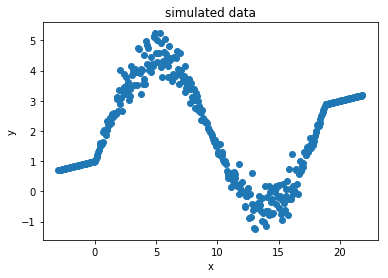

In [0]:
## use custom function to simulate some data 
x,y = create_random_data(n=300) #A
plt.scatter(x=x,y=y,marker='o')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
n=len(x)

## First model: NN for the most simple linear regression 

Use a NN w/o hidden layer and with one output node to fit a linear regression model where the mean parameter of the CPD linearly depends on x. Since the variance is not modeled, the loss function or NLL is given by the MSE (see derivation in chapter 4.3).

In [0]:
# set up a NN without hidden layer and only one output node 
# This assumes that the mean of the CPD depends linearly on x
# and the standard deviation of the CPD is constant and not modeled
model = Sequential()
model.add(Dense(1, activation='linear',batch_input_shape=(None, 1)))
model.compile(loss='mean_squared_error',optimizer="adam")

In [0]:
# get a summary of the NN architectures 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### Train the first model and show the fit along with the data

In [0]:
# train the model  
history=model.fit(x, y, 
                  batch_size=n, 
                  epochs=5000,
                  verbose=0, 
                 )

In [0]:
model.evaluate(x,y)

420/420 [==============================] - 0s 89us/sample - loss: 2.5284


2.528433719135466

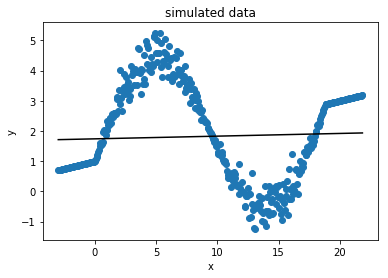

In [0]:
# show the data along with the fit
plt.scatter(x=x,y=y,marker='o')
plt.plot(x,model.predict(x),c="black")
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [0]:
# get model parameters: slope and intercept of the linear model
model.get_weights()

[array([[0.00893108]], dtype=float32), array([1.7413089], dtype=float32)]

## Second model: NN for a non-linear  regression model

Use a NN with hidden layer and with one output node to fit a linear regression model where the mean parameter of the CPD can non-linearly depend on x. Since the variance is not modeled, the loss function or NLL is given by the MSE (see derivation in chapter 4.3).

In [0]:
# set up a NN with 3 hidden layers and only one output node 
# This allows that the mean of the CPD depends non-linearly on x
# and the standard deviation of the CPD is constant and not modeled
model = Sequential()
model.add(Dense(20, activation='relu',
                batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',optimizer="adam")

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_11 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 2,131
Trainable params: 2,131
Non-trainable params: 0
_________________________________________________________________


#### Train the second model and show the fit along with the data

In [0]:
# train the model
history=model.fit(x, y, 
                  batch_size=n, 
                  epochs=10000,
                  verbose=0, 
                 )

In [0]:
model.evaluate(x,y)

420/420 [==============================] - 0s 103us/sample - loss: 0.0645


0.06448783066845776

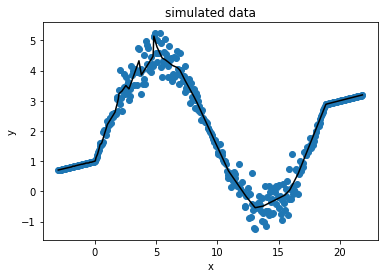

In [0]:
# show the data along with the fit
plt.scatter(x=x,y=y,marker='o')
plt.plot(np.linspace(-3,3*2*np.pi+3,1000),model.predict(np.linspace(-3,3*2*np.pi+3,1000)),c="black")
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Third model: NN for a non-linear  regression model with changing variance

Use a NN with hidden layer and two output node to  fit a linear regression model where the mean and the standard-deviation parameter of the CPD can non-linearly depend on x. Since the variance is now also modeled, the loss function or NLL is not anymore given by the MSE but has a more complicated form (see derivation in chapter 4.3). Keras does not provide this loss function therefore you must program it yourself.

In [0]:
# define loss function that corresponds to NLL  
import math
def my_loss(y_true,y_pred):
  mu=tf.slice(y_pred,[0,0],[-1,1])              # A     
  sigma=tf.math.exp(tf.slice(y_pred,[0,1],[-1,1]))   # B 
  
  a=1/(tf.sqrt(2.*math.pi)*sigma) 
  b1=tf.square(mu-y_true)
  b2=2*tf.square(sigma)
  b=b1/b2
  
  loss = tf.reduce_sum(-tf.math.log(a)+b,axis=0)
  return loss

#A extract first column for μ 
#B extract second column for σ

In [0]:
# set up the model with3  hidden layers and 2 output nodes
# This allows that the mean of the CPD depends non-linearly on x
# and also the standard deviation can depend non-linearly on x
model =  Sequential()
model.add(Dense(20, activation='relu',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='linear'))

model.compile(loss=my_loss,optimizer="adam",metrics=[my_loss])

In [0]:
# show a summary of the NN architecture
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_27 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_28 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 42        
Total params: 2,152
Trainable params: 2,152
Non-trainable params: 0
_________________________________________________________________


#### Train the third model and show the fit along with the data

In [0]:
# train the model
history=model.fit(x, y, 
                  batch_size=n, 
                  epochs=8000,
                  verbose=0)

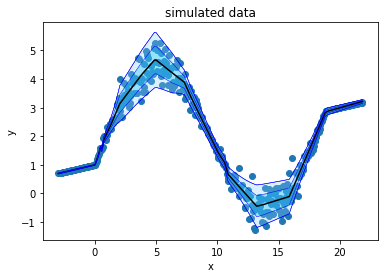

In [0]:
# show the data along with the fit plus/minus 2-times the standard deviation
x_pred=np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1)
pred_mu=model.predict(np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1))[:,0]
pred_log_sigma=model.predict(np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1))[:,1]
plt.scatter(x,y,marker='o')
plt.plot(x_pred,pred_mu,c="black")

pred_1_sd_p = pred_mu+(np.exp(pred_log_sigma))
pred_1_sd_m = pred_mu-(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_1_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_1_sd_m, 'b', linewidth=0.5)

pred_2_sd_p = pred_mu+2*(np.exp(pred_log_sigma))
pred_2_sd_m = pred_mu-2*(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_2_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_2_sd_m, 'b', linewidth=0.5)

plt.plot(x_pred,pred_mu+2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)
plt.plot(x_pred,pred_mu-2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)

plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_2_sd_p,
                         pred_2_sd_m[::-1]]),alpha=0.3, fc='lightskyblue', ec='None')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_1_sd_p,
                         pred_1_sd_m[::-1]]),alpha=0.3, fc='deepskyblue', ec='None')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Exercise 1

In [0]:
### The Likelihood for different number of faces

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  


*Exercise: Change the activations to sigmoid and redo the analysis.

####.

































#### Solution 
When using sigmoid as activation function wo get a changed result: The curves for the fit (mean) and also the curves for the reference interval (mean plus/minus 2-times stddev=) now apprear much smoother. This effect is probably due to the fact that relus are not smooth and if you change the input to a ReLU from negative to small positive you gets activated and contributes to the output.